### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
df = pd.read_csv("gld_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [13]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [27]:
df.shape

(2290, 6)

In [15]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
df.size

13740

Correlation:
1. positive Correlation ==> directly proportional 
2. Negative correlation ==> indirectly proportional 

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
correlation = df.corr()

In [20]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


#### construct the heatmap to understand the correlation

<Axes: >

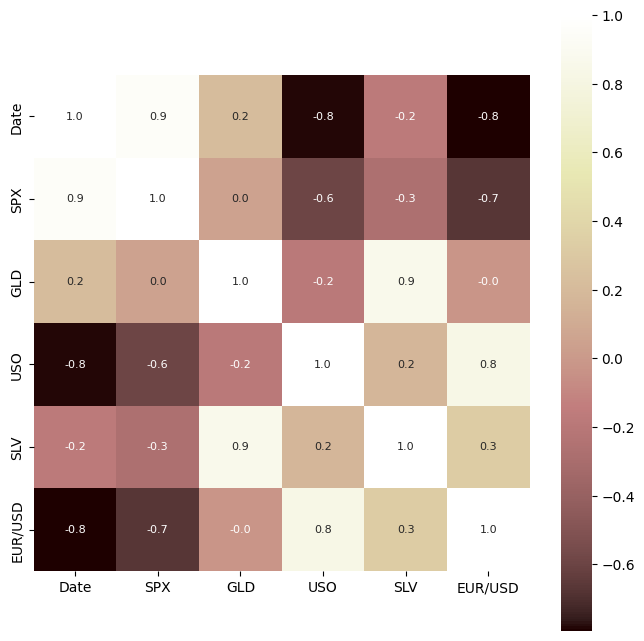

In [29]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation,
            cbar=True,
            square=True,
            fmt=".1f",
            annot=True,              # to display the numbers
            annot_kws={"size": 8},   # font size for numbers
            cmap="pink")            # color map


### correlation value of GLD

In [25]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


### Checking the distribution of the GLD price

C:\Users\Dell\AppData\Local\Temp\ipykernel_18544\673373793.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

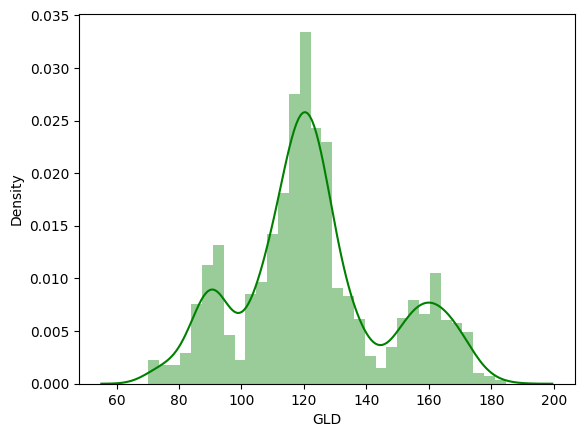

In [34]:
sns.distplot(df['GLD'],color = 'green')

### Splitting the feature and Target 

In [35]:
x = df.drop(['Date','GLD'],axis = 1)
y = df['GLD']

In [36]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [37]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


#### spliting the data into train and test

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2, random_state = 10)

#### Model training using random forest regressor

In [41]:
regressor = RandomForestRegressor(n_estimators = 100)

##### training the model

In [42]:
regressor.fit(xtrain,ytrain)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Model evalutaion

In [43]:
test_data_prediction = regressor.predict(xtest)

In [44]:
print(test_data_prediction)

[156.63530477 109.13119968 107.25599993  86.12179966 123.37450003
 127.83159984 136.52839961  89.72049944 122.08239999 169.49819825
 108.60319905 153.93180112  87.12660052  87.34040032 152.88710042
 121.98849956  88.0610996  125.38599871 121.78510036  93.99090164
 122.13530004  81.82420122  94.18180089 124.89679898 154.70610127
 125.7382     161.23400426  99.49390125  96.08170054 115.76399818
 126.71909918 126.09390004  80.35669983  88.28109924 117.00860002
 167.21419777 113.90079855 125.29159905 126.68629937  97.65720088
 134.9466984  165.50500071 115.93569995 146.45659728  91.59360146
 105.69420019 120.63660028 162.3233017  108.51329736 120.81579945
 148.88550254 123.77339857 137.76270128 170.17290056 124.55710018
 155.36449919 166.72290192 125.89629975 149.78429981 120.75700019
 117.74630062 125.0533008  125.80280007 117.58720047 120.48000081
 151.89310236  99.85090193 117.33650079 121.57459941 128.57680069
 109.07469961 104.16219905 113.87229967  85.94349852 154.89380307
 177.62619

# R square error

In [45]:
error_score = metrics.r2_score(ytest,test_data_prediction)
print("R square error:",error_score)

R square error: 0.9894863068814057


# compare the actual value and predicted values in a plot

In [46]:
y_test = list(ytest)

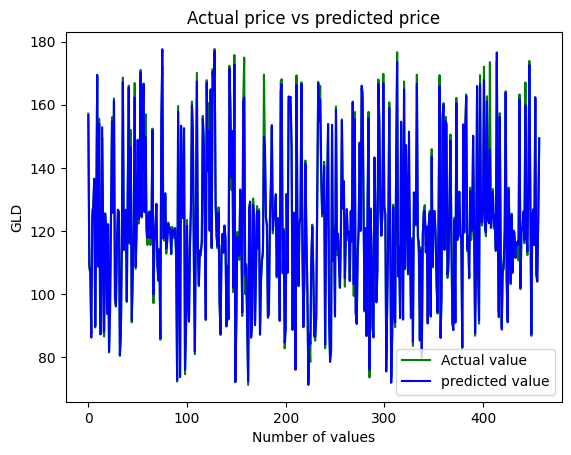

In [48]:
plt.plot(y_test,color= 'Green',label = 'Actual value')
plt.plot(test_data_prediction, color = 'blue', label = 'predicted value')
plt.title('Actual price vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD')
plt.legend()
plt.show()